In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
inputs = tf.placeholder(tf.float32, [None, 3000], 'inputs')
targets = tf.placeholder(tf.float32, [None, 25], 'targets')

/afs/inf.ed.ac.uk/user/s17/s1773005/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
def get_error_and_accuracy(data):
    """Calculate average error and classification accuracy across a dataset.
    
    Args:
        data: Data provider which iterates over input-target batches in dataset.
        
    Returns:
        Tuple with first element scalar value corresponding to average error
        across all batches in dataset and second value corresponding to
        average classification accuracy across all batches in dataset.
    """
    err = 0
    acc = 0
    for input_batch, target_batch in data:
        err += sess.run(error, feed_dict={inputs: input_batch, targets: target_batch})
        acc += sess.run(accuracy, feed_dict={inputs: input_batch, targets: target_batch})
    err /= data.num_batches
    acc /= data.num_batches
    return err, acc

In [3]:
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.tanh(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.tanh(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
#regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
#error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_100_25_t = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 13.27 running acc average = 0.10
End of epoch 2: running error average = 8.29 running acc average = 0.17
End of epoch 3: running error average = 6.22 running acc average = 0.21
End of epoch 4: running error average = 4.95 running acc average = 0.24
End of epoch 5: running error average = 4.15 running acc average = 0.24
End of epoch 6: running error average = 3.52 running acc average = 0.26
End of epoch 7: running error average = 2.99 running acc average = 0.27
End of epoch 8: running error average = 2.60 running acc average = 0.29
End of epoch 9: running error average = 2.32 running acc average = 0.31
End of epoch 10: running error average = 2.10 running acc average = 0.34
End of epoch 11: running error average = 1.97 running acc average = 0.34
End of epoch 12: running error average = 1.88 running acc average = 0.36
End of epoch 13: running error average = 1.83 running acc average = 0.38
End of epoch 14: running error average = 1.80 running acc a

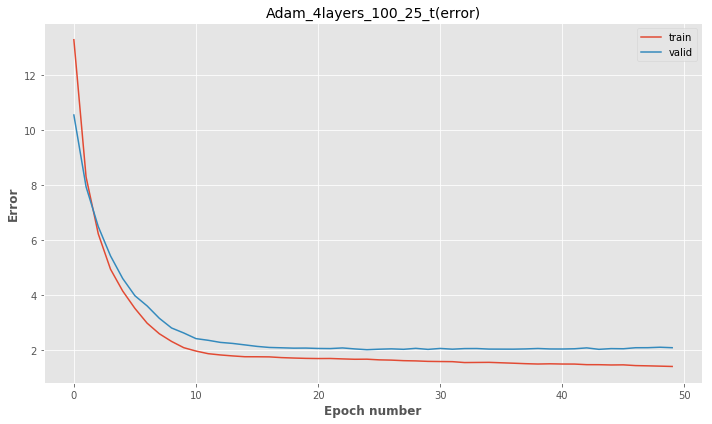

In [4]:
data = Adam_4layers_100_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100_25_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_100_25_t(error).pdf')

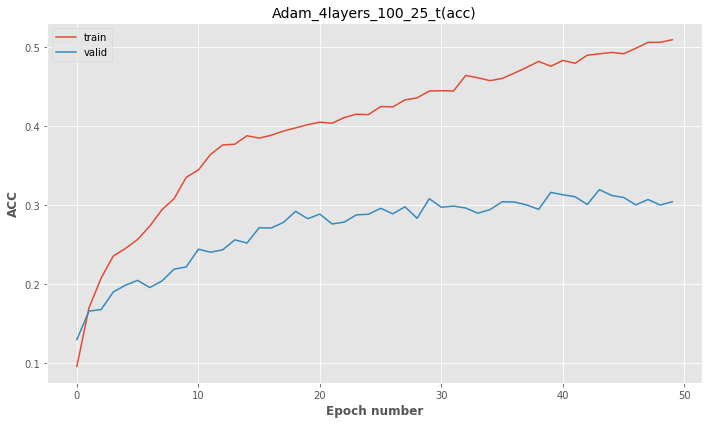

In [5]:
data = Adam_4layers_100_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100_25_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_100_25_t(acc).pdf')

In [6]:
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.tanh(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.tanh(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['h3'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_100_L2_25_t = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 1501.26 running acc average = 0.09
End of epoch 2: running error average = 1248.12 running acc average = 0.17
End of epoch 3: running error average = 994.41 running acc average = 0.23
End of epoch 4: running error average = 744.58 running acc average = 0.28
End of epoch 5: running error average = 511.42 running acc average = 0.33
End of epoch 6: running error average = 312.56 running acc average = 0.37
End of epoch 7: running error average = 163.92 running acc average = 0.39
End of epoch 8: running error average = 70.79 running acc average = 0.40
End of epoch 9: running error average = 24.36 running acc average = 0.44
End of epoch 10: running error average = 7.12 running acc average = 0.49
End of epoch 11: running error average = 2.69 running acc average = 0.53
End of epoch 12: running error average = 1.92 running acc average = 0.54
End of epoch 13: running error average = 1.81 running acc average = 0.55
End of epoch 14: running error average = 1

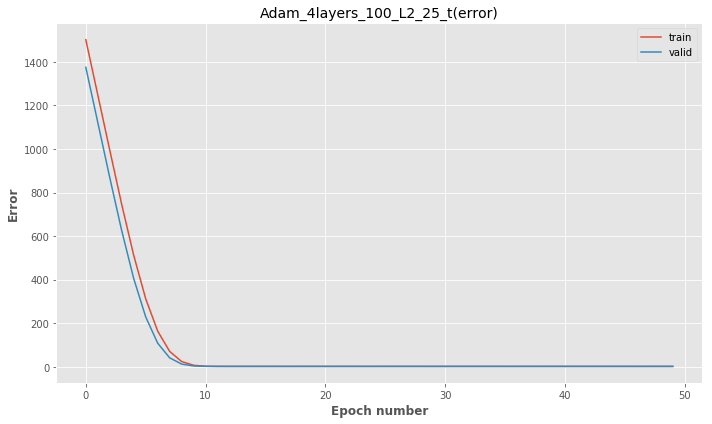

In [7]:
data = Adam_4layers_100_L2_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100_L2_25_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_100_L2_25_t(error).pdf')

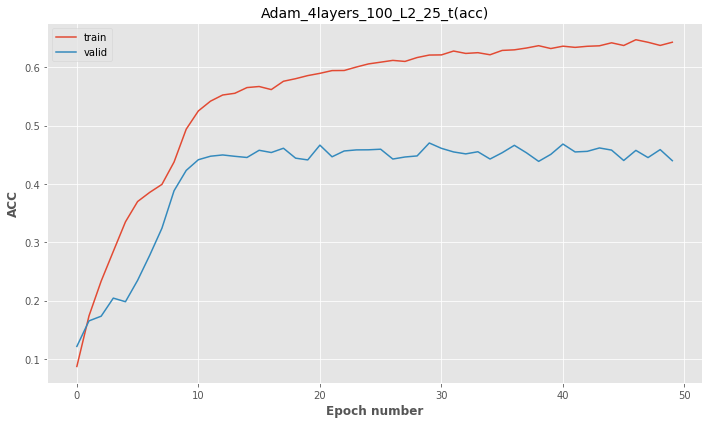

In [8]:
data = Adam_4layers_100_L2_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100_L2_25_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_100_L2_25_t(acc).pdf')

In [9]:
n_hidden_1 = 200
n_hidden_2 = 200
n_hidden_3 = 200
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.tanh(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.tanh(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
#regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
#error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_200_25_t = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 19.68 running acc average = 0.11
End of epoch 2: running error average = 13.24 running acc average = 0.18
End of epoch 3: running error average = 10.15 running acc average = 0.22
End of epoch 4: running error average = 8.30 running acc average = 0.25
End of epoch 5: running error average = 7.12 running acc average = 0.26
End of epoch 6: running error average = 6.22 running acc average = 0.26
End of epoch 7: running error average = 5.37 running acc average = 0.28
End of epoch 8: running error average = 4.71 running acc average = 0.28
End of epoch 9: running error average = 4.10 running acc average = 0.29
End of epoch 10: running error average = 3.62 running acc average = 0.30
End of epoch 11: running error average = 3.15 running acc average = 0.32
End of epoch 12: running error average = 2.78 running acc average = 0.32
End of epoch 13: running error average = 2.47 running acc average = 0.33
End of epoch 14: running error average = 2.23 running acc

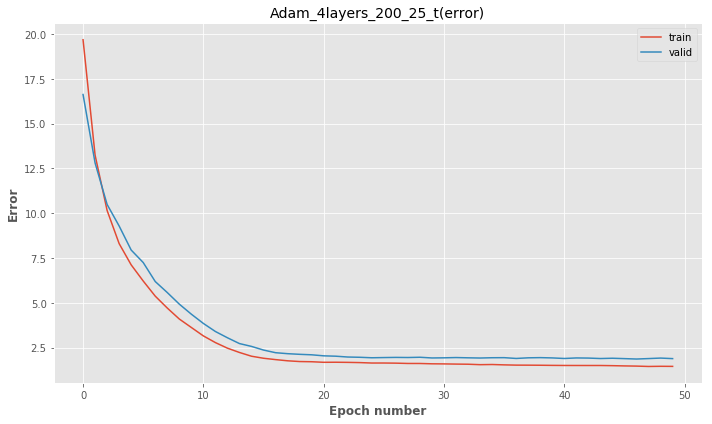

In [10]:
data = Adam_4layers_200_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200_25_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_200_25_t(error).pdf')

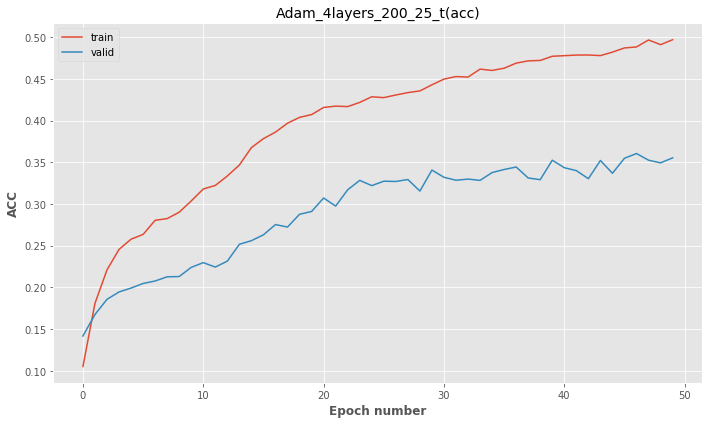

In [11]:
data = Adam_4layers_200_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200_25_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_200_25_t(acc).pdf')

In [10]:
n_hidden_1 = 200
n_hidden_2 = 200
n_hidden_3 = 200
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.tanh(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.tanh(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['h3'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_200_L2_25_t = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 3226.80 running acc average = 0.10
End of epoch 2: running error average = 2798.10 running acc average = 0.21
End of epoch 3: running error average = 2358.48 running acc average = 0.27
End of epoch 4: running error average = 1907.72 running acc average = 0.33
End of epoch 5: running error average = 1455.09 running acc average = 0.39
End of epoch 6: running error average = 1022.02 running acc average = 0.47
End of epoch 7: running error average = 640.66 running acc average = 0.52
End of epoch 8: running error average = 344.89 running acc average = 0.50
End of epoch 9: running error average = 152.09 running acc average = 0.47
End of epoch 10: running error average = 52.17 running acc average = 0.48
End of epoch 11: running error average = 13.80 running acc average = 0.51
End of epoch 12: running error average = 3.73 running acc average = 0.54
End of epoch 13: running error average = 2.03 running acc average = 0.55
End of epoch 14: running error ave

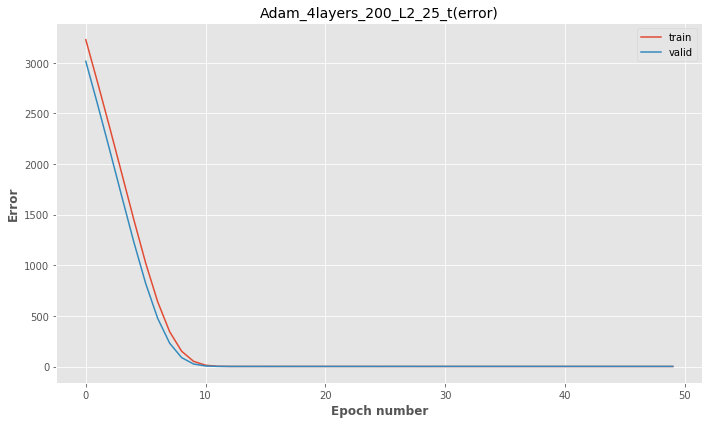

In [11]:
data = Adam_4layers_200_L2_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200_L2_25_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_200_L2_25_t(error).pdf')

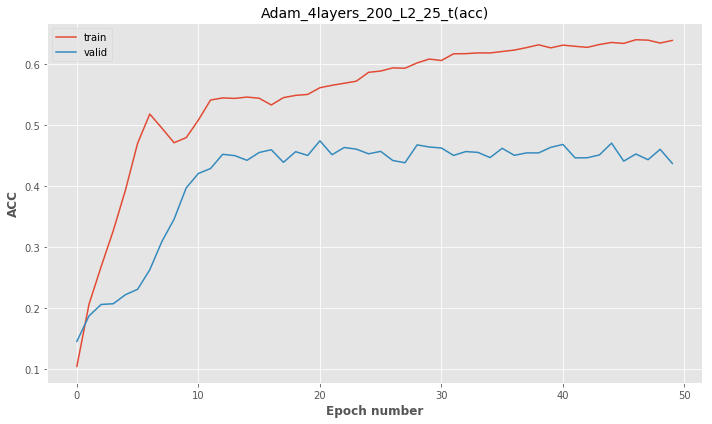

In [12]:
data = Adam_4layers_200_L2_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200_L2_25_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_200_L2_25_t(acc).pdf')

In [15]:
n_hidden_1 = 300
n_hidden_2 = 300
n_hidden_3 = 300
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.tanh(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.tanh(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
#regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
#error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_300_25_t = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 25.04 running acc average = 0.11
End of epoch 2: running error average = 17.39 running acc average = 0.19
End of epoch 3: running error average = 13.73 running acc average = 0.23
End of epoch 4: running error average = 11.40 running acc average = 0.26
End of epoch 5: running error average = 10.03 running acc average = 0.27
End of epoch 6: running error average = 8.80 running acc average = 0.28
End of epoch 7: running error average = 7.77 running acc average = 0.29
End of epoch 8: running error average = 6.92 running acc average = 0.29
End of epoch 9: running error average = 6.25 running acc average = 0.29
End of epoch 10: running error average = 5.62 running acc average = 0.30
End of epoch 11: running error average = 5.03 running acc average = 0.31
End of epoch 12: running error average = 4.47 running acc average = 0.31
End of epoch 13: running error average = 3.99 running acc average = 0.32
End of epoch 14: running error average = 3.54 running a

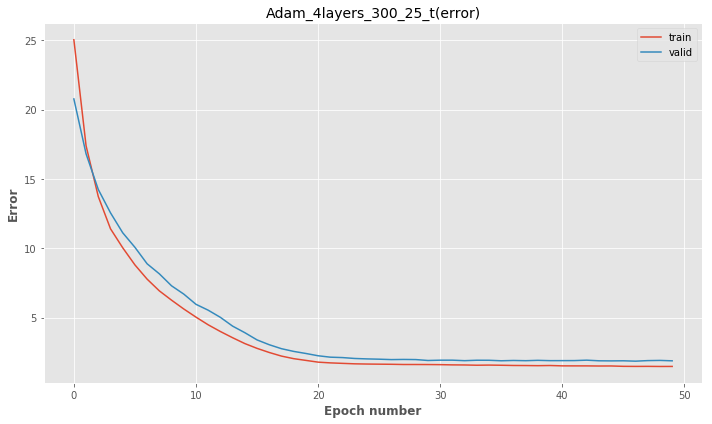

In [16]:
data = Adam_4layers_300_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300_25_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_300_25_t(error).pdf')

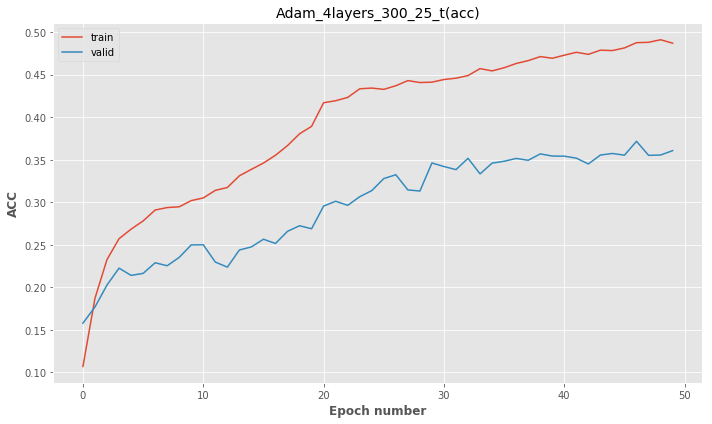

In [17]:
data = Adam_4layers_300_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300_25_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_300_25_t(acc).pdf')

In [5]:
n_hidden_1 = 300
n_hidden_2 = 300
n_hidden_3 = 300
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.tanh(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.tanh(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['h3'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_300_L2_25_t = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 5139.65 running acc average = 0.11
End of epoch 2: running error average = 4515.51 running acc average = 0.22
End of epoch 3: running error average = 3887.86 running acc average = 0.29
End of epoch 4: running error average = 3245.60 running acc average = 0.35
End of epoch 5: running error average = 2588.17 running acc average = 0.43
End of epoch 6: running error average = 1931.98 running acc average = 0.52
End of epoch 7: running error average = 1314.17 running acc average = 0.60
End of epoch 8: running error average = 787.15 running acc average = 0.59
End of epoch 9: running error average = 397.96 running acc average = 0.53
End of epoch 10: running error average = 161.14 running acc average = 0.50
End of epoch 11: running error average = 49.43 running acc average = 0.49
End of epoch 12: running error average = 11.54 running acc average = 0.53
End of epoch 13: running error average = 3.12 running acc average = 0.54
End of epoch 14: running error 

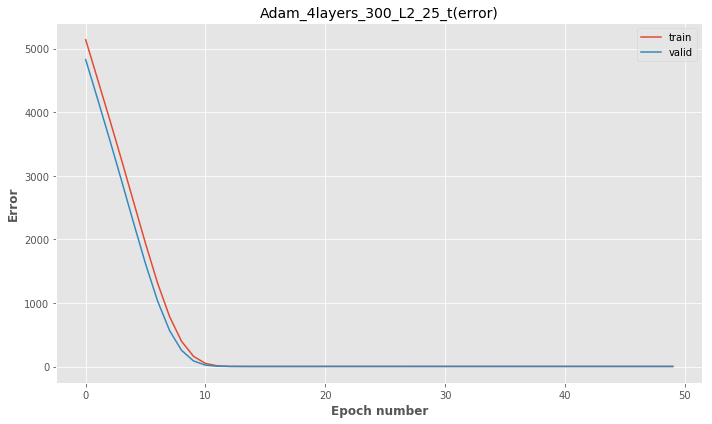

In [6]:
data = Adam_4layers_300_L2_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300_L2_25_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_300_L2_25_t(error).pdf')

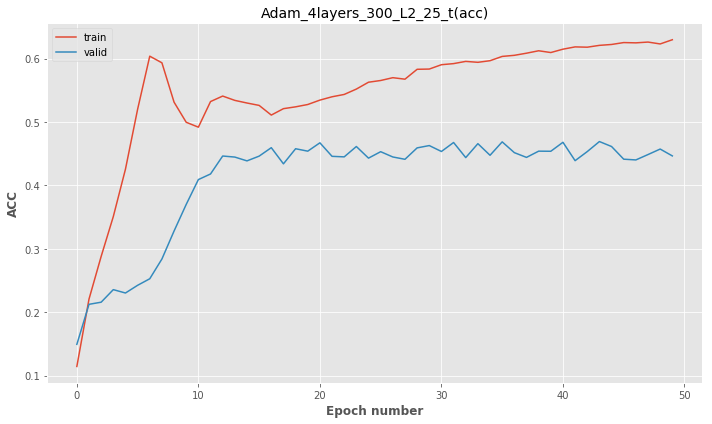

In [7]:
data = Adam_4layers_300_L2_25_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300_L2_25_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('Adam_4layers_300_L2_25_t(acc).pdf')

In [21]:
np.save('Adam_4layers_100_25_t', Adam_4layers_100_25_t)
np.save('Adam_4layers_100_L2_25_t', Adam_4layers_100_L2_25_t)
np.save('Adam_4layers_200_25_t', Adam_4layers_200_25_t)
np.save('Adam_4layers_200_L2_25_t_200', Adam_4layers_200_L2_25_t_200)
np.save('Adam_4layers_300_25_t', Adam_4layers_300_25_t)
np.save('Adam_4layers_300_L2_25_t_200', Adam_4layers_300_L2_25_t_200)

In [13]:
np.save('Adam_4layers_200_L2_25_t', Adam_4layers_200_L2_25_t)
np.save('Adam_4layers_300_L2_25_t', Adam_4layers_300_L2_25_t)